In [ ]:
# windfarm within 5km
# [11,27,35,36,57,61,75,95,97,101,106,112,117,120,132,146,180,186,190,194,204,205,212,226,227,229,232,239,279,285,348,376,393]
# windfarm within 3km
len([27,36,57,61,75,97,101,106,120,132,190,204, 239, 285,348,376])

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from pyproj import Proj, transform, Geod
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from warnings import simplefilter
warnings.filterwarnings("ignore", category =UserWarning,)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

### Get rain gauge locations

In [3]:
# Get tb0 values at each gauge
rain_gauges = pd.read_csv('/nfs/a319/gy17m2a/PhD/datadir/RainGauge/interarrival_thresholds_CDD_noMissing.txt')
len(rain_gauges)

1294

### Fill in missing values (estimated from google)

In [4]:
rain_gauges.loc[rain_gauges['Station_id'] == 'EAUTTONR', ['Lon', 'Lat']] = [0.001890, 52.268872]
rain_gauges.loc[rain_gauges['Station_id'] == 'EA34_02_04', ['Lon', 'Lat']] = [0.757582, 52.912141]
rain_gauges.loc[rain_gauges['Station_id'] == 'EALLEVINGR', ['Lon', 'Lat']] = [1.252452, 52.005705]

In [5]:
geometry = [Point(lon, lat) for lon, lat in zip(rain_gauges['Lon'], rain_gauges['Lat'])]
rain_gauges_gdf = gpd.GeoDataFrame(rain_gauges, geometry=geometry, crs='EPSG:4326')

### Get windfarm locations

In [6]:
windfarms = pd.read_csv('/nfs/a319/gy17m2a/PhD/datadir/NIMROD/windfarms.csv', encoding='latin1')
windfarms =windfarms[windfarms['Technology Type']=='Wind Onshore']
windfarms = windfarms[(windfarms['Development Status'] == 'Operational') | (windfarms['Development Status'] == 'Decommissioned')]

# Read shapefile of UK outline
uk_outline = gpd.read_file('/nfs/a319/gy17m2a/PhD/datadir/SpatialData/UK_shp/GBR_adm0.shp')

# Define a function to convert BNG coordinates to latitude and longitude
def bng_to_latlon(x, y):
    in_proj = Proj(init='epsg:27700')  # British National Grid projection
    out_proj = Proj(init='epsg:4326')  # WGS84 (latitude and longitude) projection
    lon, lat = transform(in_proj, out_proj, x, y)
    return lon, lat

# # Convert BNG coordinates to latitude and longitude
windfarms['lon'], windfarms['lat'] = zip(*windfarms.apply(lambda row: bng_to_latlon(row['X-coordinate'], row['Y-coordinate']), axis=1))

# Convert DataFrame to GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(windfarms['lon'], windfarms['lat'])]
windfarms_gdf = gpd.GeoDataFrame(windfarms, geometry=geometry, crs='EPSG:4326')

### Plot

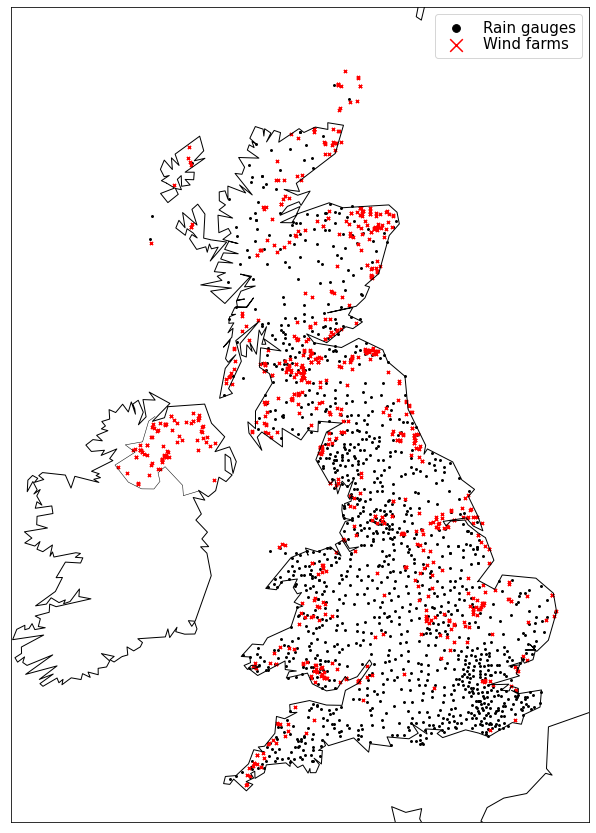

In [129]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)

# Define map boundaries
llcrnrlon = -10.5  # lower left corner longitude
llcrnrlat = 49.5   # lower left corner latitude
urcrnrlon = 2.5    # upper right corner longitude
urcrnrlat = 60.0   # upper right corner latitude

fig,ax=plt.subplots(figsize=(20, 15))

# Create Basemap instance
m = Basemap(
    projection='merc',  # Mercator projection
    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,  # lower left corner
    urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat,  # upper right corner
    resolution='l'  # low resolution
)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude coordinates to map coordinates
x, y = m(rain_gauges['Lon'].values, rain_gauges['Lat'].values)

# Plot the points on the map
m.scatter(x, y, s=15, marker='.', color='black', alpha=1, label = 'Rain gauges')

# Convert latitude and longitude coordinates to map coordinates
x, y = m(windfarms['lon'].values,windfarms['lat'].values)

# Plot the points on the map
m.scatter(x, y, s=10, marker='x', color='r', alpha=1, label = 'Wind farms')

plt.legend(fontsize=15, markerscale=4, labelspacing=.1)

# Show the map
fig.savefig('RainGauges_vs_Windfarms', dpi=500, bbox_inches='tight')
plt.show()


In [107]:
# windfarm within 5km
# [11,27,35,36,57,61,75,95,97,101,106,112,117,120,132,146,180,186,190,194,204,205,212,226,227,229,232,239,279,285,348,376,393]
# windfarm within 3km
len([27,36,57,61,75,97,101,106,120,132,190,204, 239, 285,348,376])

,Station_id,Station_name,Lon,Lat,Critical_interarrival_time,geometry
0,EA000008,harley_logger,-1.441003,53.480547,7.50,POINT (-1.44100 53.48055)
1,EA000076TP,prestwood_reservoir_tbr,-0.747444,51.701009,9.00,POINT (-0.74744 51.70101)
2,EA000102TP,elsenham_g.c,0.245191,51.915371,9.50,POINT (0.24519 51.91537)
3,EA000180TP,havering_bower,0.168787,51.619601,12.50,POINT (0.16879 51.61960)
4,EA000181TP,nazeing_g.c,0.040314,51.728627,10.50,POINT (0.04031 51.72863)
...,...,...,...,...,...,...
1289,SEPA504458,kirkcudbright,-4.037240,54.845340,5.75,POINT (-4.03724 54.84534)
1290,SEPA506152,unthank,-2.962650,55.242860,3.50,POINT (-2.96265 55.24286)
1291,SEPA515885,kirkwall,-2.899880,58.953870,8.75,POINT (-2.89988 58.95387)
1292,SEPA517412,balfron_stw,-4.343600,56.067710,4.25,POINT (-4.34360 56.06771)


AttributeError: 'Polygon' object has no property 'legend'

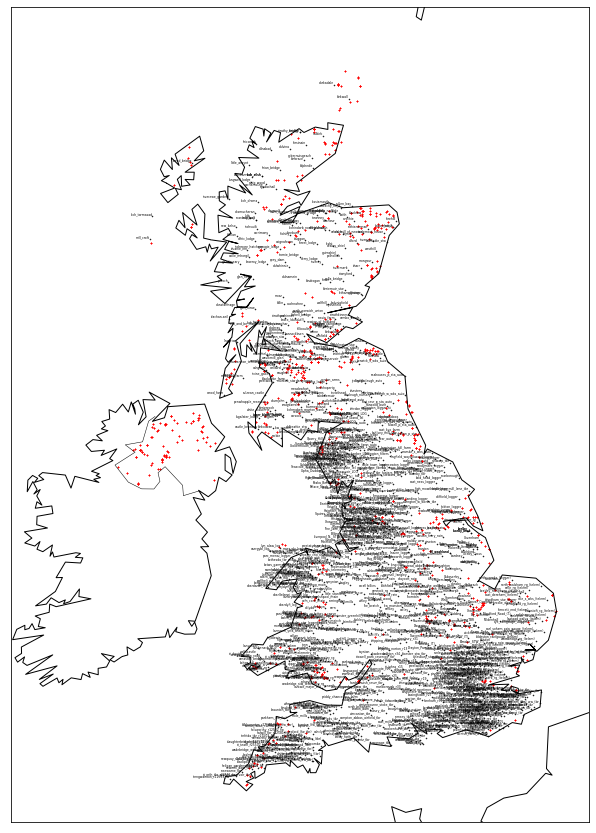

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point
import pandas as pd


# Define map boundaries
llcrnrlon = -10.5  # lower left corner longitude
llcrnrlat = 49.5   # lower left corner latitude
urcrnrlon = 2.5    # upper right corner longitude
urcrnrlat = 60.0   # upper right corner latitude

fig, ax = plt.subplots(figsize=(20, 15))

# Create Basemap instance
m = Basemap(
    projection='merc',  # Mercator projection
    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,  # lower left corner
    urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat,  # upper right corner
    resolution='l'  # low resolution
)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude coordinates to map coordinates for wind farms
x, y = m(rain_gauges['Lon'].values, rain_gauges['Lat'].values)
# Plot the wind farms
m.scatter(x, y, s=1, marker='.', color='black', alpha=1, label='Rain gauges')

# Convert latitude and longitude coordinates to map coordinates for rain gauges
# Plot the rain gauges
for number, lon, lat, station_id in zip(rain_gauges.index, rain_gauges['Lon'], rain_gauges['Lat'], rain_gauges['Station_name']):
    # Convert lon/lat to map coordinates
    x, y = m(lon, lat)
    plt.text(x, y, station_id, fontsize=3, ha='right', va='bottom', color='black')
    if number in [27,36,57,61,75,97,101,106,120,132,190,204, 239, 285,348,376]:
        # Add text label for station_id
        plt.text(x, y, station_id, fontsize=3, ha='right', va='bottom', color='black')

# Convert latitude and longitude coordinates to map coordinates for wind farms
x, y = m(windfarms['lon'].values, windfarms['lat'].values)
# Plot the wind farms
m.scatter(x, y, s=1, marker='x', color='r', alpha=1, label='Wind farms')

from shapely.geometry import Point
from descartes import PolygonPatch

# Create buffers around windfarm locations
for lon, lat in zip(windfarms['lon'], windfarms['lat']):
    # Convert lon/lat to map coordinates
    x, y = m(lon, lat)
    
    # Plot the circle buffer
    m.tissot(lon, lat, (3000 / 111000), 100, facecolor='none', edgecolor='blue', linewidth=0.5, alpha=0.8, legend ='3km buffer zone')


# Show the legend
plt.legend(fontsize=15, markerscale=8, labelspacing=.1)

# Show the map
fig.savefig('RainGauges_vs_Windfarms', dpi=500, bbox_inches='tight')
plt.show()
